In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data1 = pd.read_csv("NewspaperData.csv")
data1.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [4]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


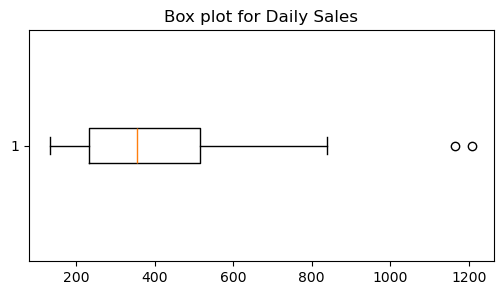

In [6]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"], vert = False)
plt.show()

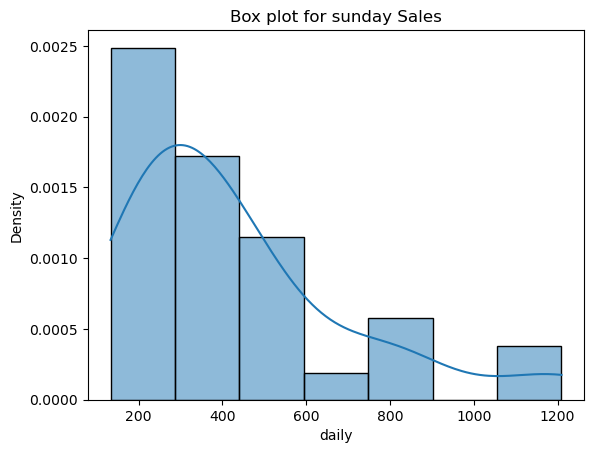

In [7]:
sns.histplot(data1['daily'],kde = True,stat='density')
plt.title("Box plot for sunday Sales")
plt.show()

# observations 
* There are no missing values
* The daily column values appears to be right_skewed
* The sunday column values also appear to be right-skewed
* There are two outliers in both daily colum and also in sunday column as observed from the above table

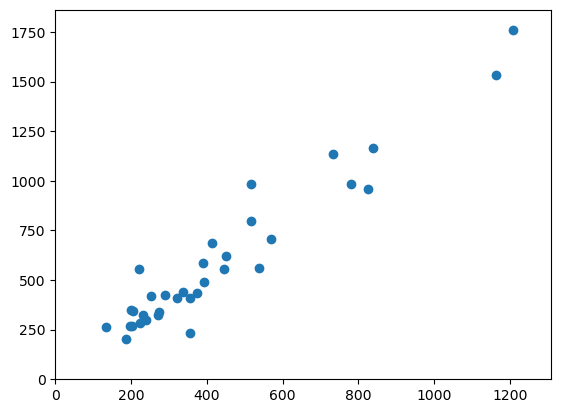

In [9]:
x = data1["daily"]
y = data1['sunday']
plt.scatter(data1["daily"], data1['sunday'])
plt.xlim(0, max(x) + 100)
plt.ylim(0, max(y) + 100)
plt.show()
            

In [10]:
data1["daily"].corr(data1["sunday"])
                    

0.9581543140785462

In [11]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [12]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


# observations on cerrelation strength
* The relationship between x (daily) and y (sunday) is seen to be linear as seen from scatter plot
* The correlation is strong and positive with pearson's correlation coefficient 0.958154

# Fit a linear Regression Model

In [15]:
#Build regression model

import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data1).fit()


In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        09:32:09   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# observations

* R²=1->Perfect fit(all variance explained)
* R²= 0-> Model does not explain any variance
* R² close to 1-> Good model fit
* R²close to 0 -> Poor model fit

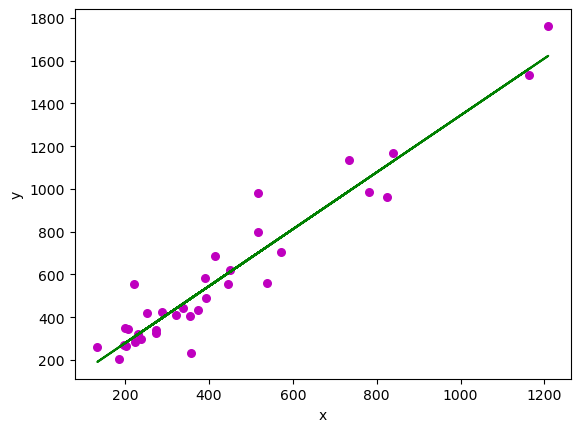

In [19]:
# plot the scatter plot and overlay the fitted line using matplotlib
x = data1['daily'].values
y = data1['sunday'].values
plt.scatter(x,y,color = "m" , marker = 'o',s=30)
b0 = 13.84
b1 = 1.33
#Predicated response vector 
y_hat = b0 +b1*x
plt.plot(x,y_hat,color="g")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# observations

* The probability(p-value) for intercept (bet_0) is 0.707 > 0.05
* Therefore the intercept coefficient may not be tht much significant in predication
* However the p-value for "daily" (beta_1) is 0.00 < 0.05
* Therefore the beta_1 coefficient is highly sihnificantand id contributint to prediction

In [22]:
model1.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [23]:
print(f'model t-values:\n{model1.tvalues}\n-------------\nmodel p-values: \n{model1.pvalues}')

model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
-------------
model p-values: 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [24]:
newdata=pd.Series([200,300,1500])

In [25]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [26]:
model1.predict(data_pred)

0     281.778581
1     415.750057
2    2023.407766
dtype: float64

In [27]:
# predicted on all given training data
pred =model1.predict(data1["daily"])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [28]:
# add predicted values as a column in data1
data1["y_hat"] = pred
data1

,Newspaper,daily,sunday,y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [29]:
#compute the error values (residuals) and add as another column
data1["residuals"]=data1["sunday"]-data1["y_hat"]
data1

,Newspaper,daily,sunday,y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [30]:
# compute mean squared error for the model
mse = np.mean((data1['daily']-data1['y_hat'])**2)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  33794.87469205266
RMSE:  183.83382358002746


### Assumptions in linear simple linear regression
1. **linearity:** The relationship between the predictors(x) and the response(y) is linear.
2. **Independence:** Observations are independent of each other.
3. **Homoscedaticity:** The residuala (y-y_hat) exhibit constant variance at all levels of the predictor.
4. **Normal Distribution of Errors:** The residual(errors) of the model are normally distributed.

In [32]:
mae = np.mean((data1["daily"]-data1["y_hat"]))
mae

-160.23994117647064

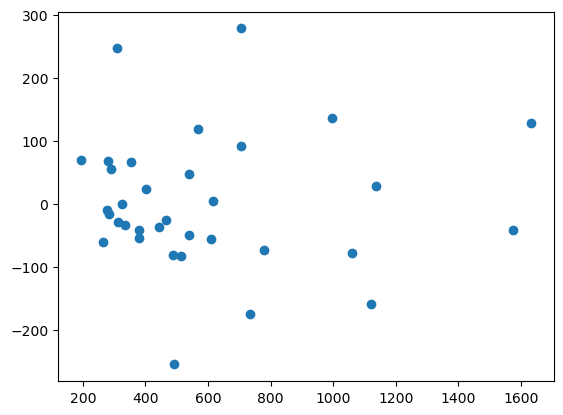

In [33]:
plt.scatter(data1["y_hat"],data1["residuals"])

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [35]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [36]:
cars=pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


## Assumptions in Multilinear Regression

**1.Linearity:** The relation between the predictors(x) and the (y) is linear.

**2.Independence:** Observations are independent of each other.

**3.Homoscedasticity:** The residuals(y-yhat) exhibit constant variance at all levels of the predictor.

**4.Normal Distribution of errors:** The residuals of the model are normally distributed.

5.**No multicollinearity:** the independent variables should not be too highly correlated with each other. 

In [38]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [39]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

## Observation about info(),missing values
* There are no missing values
* There are 81 observation(81 different cars data)
* The data types of the columns are also relevant and valid


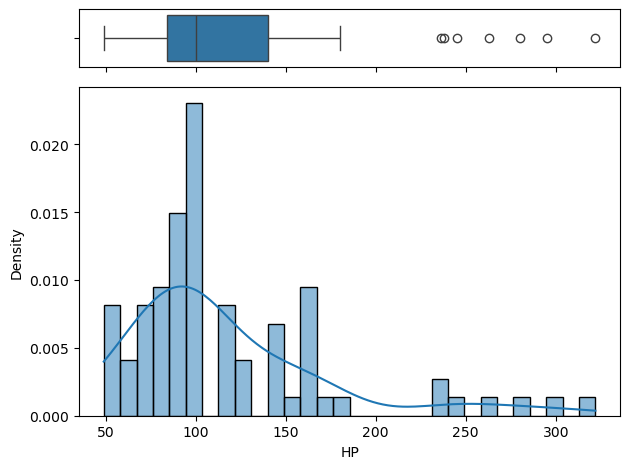

In [41]:
#create a figure with two subplots(one above the other)
fig,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})

#create a boxplot
sns.boxplot(data=cars, x='HP',ax=ax_box, orient='h')
ax_box.set(xlabel='')

sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel="Density")

plt.tight_layout()
plt.show()

# observations from boxplot nd histograms

* Therebare some extreme values (outliers)observed in towards the right tail of sp and hd distribution
* In VOL and WT columns, a few outliers are observed in both tails of their distribution.
* The extreme value of cars data may have come from the specilly designed nature of cars
* As this is multi-dimensional data.the outliers with respect to spatial dimensions may have to be considered while building the regression model


In [43]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


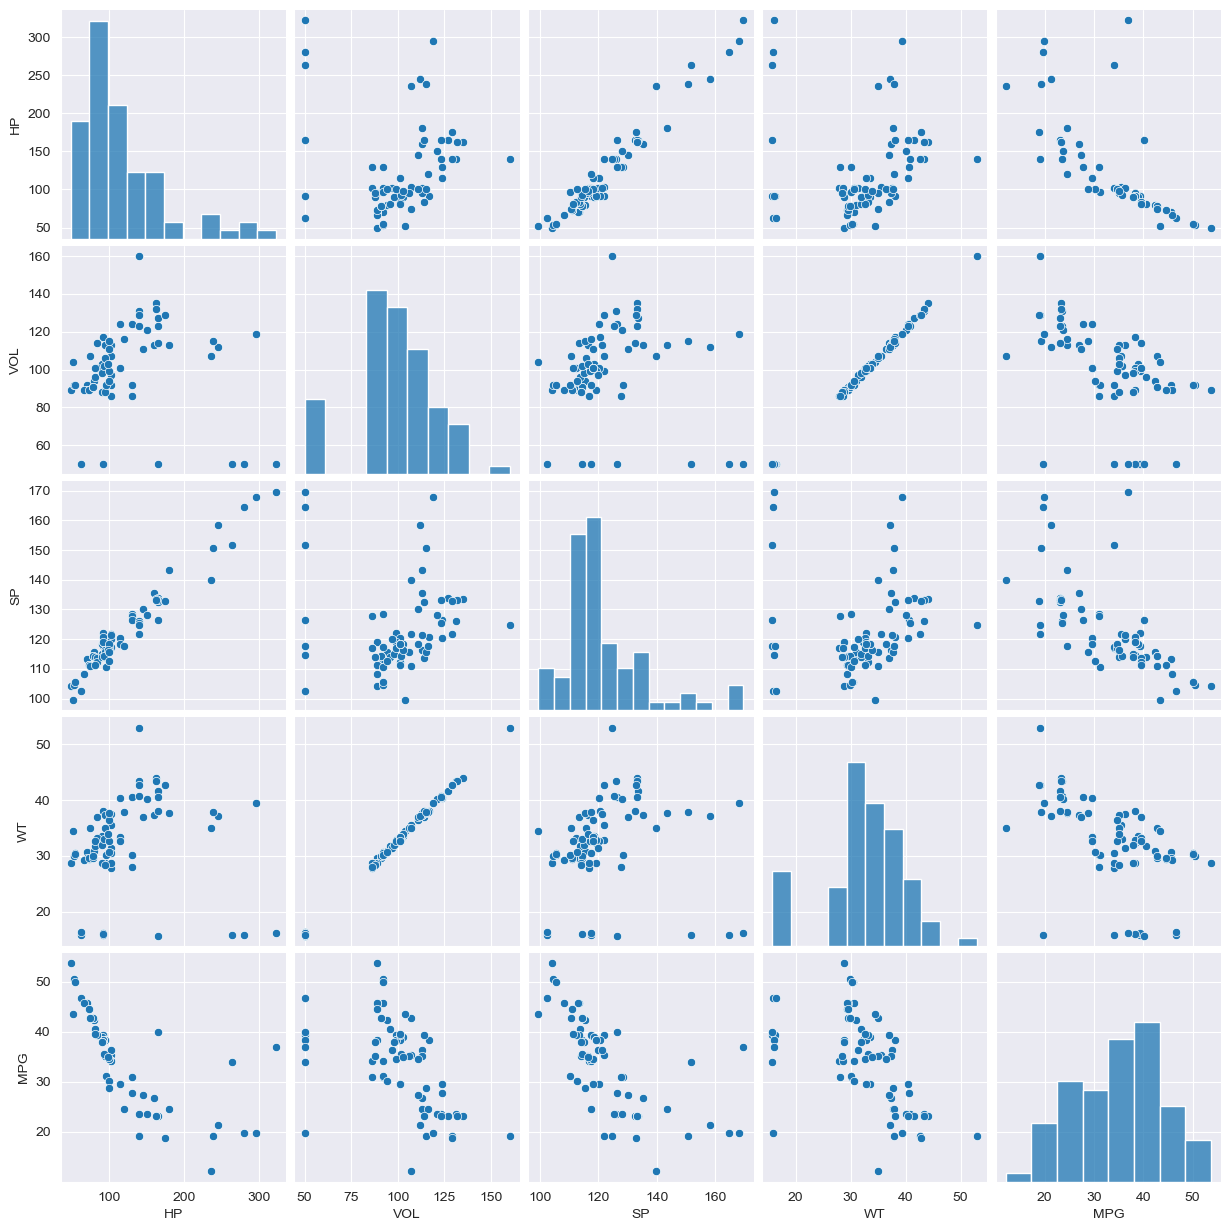

In [78]:
# Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [80]:
cars.corr(numeric_only=True)

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


In [82]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


# Observations from correlation plots and coefficients
* Between x and y,all the variables are showing to high correlation strengths,highest being between HP and MPG
* Therefore this dataset qualifies for building a multiple linear regression model to predict MPG
* Among x column (x1,x2,x3 and x4), some very high correlation strengths are observed between SP VS HP,VOL vs WT
* The high correlation among x columns is not desirable as it might lead to multicollinearity problem

In [85]:
#bulid model
#import statmodels.formula.api as smf
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()


In [87]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        09:46:42   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations from model summary
* The R-squared and adjusted R-squared values are good and about 75% of of variablility in Y is expalained by columns
* The probability value with respect to F-statistics is close to zero,indicating that all or someof X columns are significant
* The p-values for VOL and WT are higher than 5% indicating some interation issue among themselves,which need to be further explored

# Performance metrics for model1

In [91]:
# Find the performance metrics
# Create a data frame with actual y and predicted y columns

df1 =pd.DataFrame()
df1["actual_y1"] = cars['MPG']
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [93]:
# Predict for the given X data columns

pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648
